# DATASET

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('ptt_Gossiping_title_push.csv')

data = data.replace('爆',100)
for i in range(10):
    data = data.replace(f'X{i}',f'-{i}0')
data = data.replace('XX',-100)
data['推數'].astype(int)

data

,標題,推數
0,[問卦] 便利商店裡 誰也買不到,3
1,[問卦] 情侶做愛不常戴套是真的嗎,11
2,[問卦] 該唱首什麼歌來紀念愛的傻?,1
3,[問卦] 馬桶清潔凍是在香幾點的,2
4,Re: [新聞] 南投一家8口擠破屋遭蛇擾女童陳情信引鼻,0
...,...,...
39998,[問卦] 萊豬能拯救物價嗎,2
39999,[問卦] 今天是台灣民主勝利的一添嗎?,2
40000,[新聞] 北捷辦潛盾金剛命名大賽 「岩清飆」獲選,11
40001,[問卦] 輸了就說選民被洗腦？,7


# Ckip 斷詞 + 文字雲

In [4]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

In [5]:
ws_driver = CkipWordSegmenter(level=3)
pos_driver = CkipPosTagger(level=3)
ner_driver = CkipNerChunker(level=3)

In [37]:
data_title = data['標題']
text = data_title[:1000]
# Run pipeline
ws  = ws_driver(text)
pos = pos_driver(ws)
ner = ner_driver(text)

Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [02:09<00:00, 32.42s/it]


In [39]:
result = {'text':data_title[:1000],'ws':ws,'pos':pos,'ner':ner}
NLP_result = pd.DataFrame(result)
NLP_result.to_csv('NLP_result_1000.csv',encoding='utf-8-sig')

In [58]:
for i in range(len(ws)):
    for w in ws:
        for word in w:
            if len(word) == 1:
                w.remove(word)
            else:
                continue

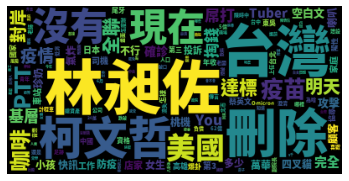

<Figure size 80000x480000 with 0 Axes>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# WordCloud 需輸入string，詞跟詞中間用空格隔開
voc = ' '.join(str(s) for s in ws)
voc2 = ''.join(str(v) for v in voc)
voc3 = voc2.replace("'","")
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = set(['問卦','八卦','Re','新聞','為什麼','怎麼','不會','什麼','為何',
                 '可以','到底'
                ])

# 產生文字雲
wc = WordCloud(font_path="NotoSansTC-Black.otf", #設置字體
               background_color="black", #背景顏色
               max_words = 400, #文字雲顯示最大詞數
               stopwords=stopwords,
               collocations = False)      #停用字詞
wc.generate(voc3)
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(100,600), dpi = 800)
plt.show()
